# Foodpanda Analysis Project

This project performs an analysis on a Foodpanda dataset to predict customer churn using various classification models.

## Project Summary

In this project, you have performed the following steps:

1.  **Data Loading**: Loaded the dataset from a CSV file into a pandas DataFrame.
2.  **Data Inspection**: Checked for missing values and reviewed the data types of each column to understand the dataset's structure and identify potential issues.
3.  **Data Preprocessing**:
    *   Used `LabelEncoder` to convert categorical columns into numerical representations.
    *   Dropped irrelevant columns that would not be useful for the churn prediction model.
4.  **Data Splitting**: Divided the dataset into features (X) and the target variable (y), which is the 'churned' column. Then, split the data into training and testing sets to prepare for model training and evaluation.
5.  **Model Training and Evaluation**:
    *   Initialized several classification models, including RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier, SVC, and XGBClassifier.
    *   Trained each model on the training data.
    *   Evaluated the performance of each model using accuracy and cross-validation scores.
    *   Identified the best-performing model based on the mean cross-validation accuracy.
6.  **Best Model Evaluation**: Performed a detailed evaluation of the best model using various metrics such as accuracy, precision, recall, and F1-score to assess its effectiveness in predicting customer churn.

In [3]:
import pandas as pd
df = pd.read_csv('/content/Foodpanda Analysis Dataset.csv')
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [4]:
df.isna().sum()

,0
customer_id,0
gender,0
age,0
city,0
signup_date,0
order_id,0
order_date,0
restaurant_name,0
dish_name,0
category,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
transform_cols=["gender","age","city","restaurant_name","dish_name","category","payment_method","churned","delivery_status"]
for cols in transform_cols:
  df[cols]=le.fit_transform(df[cols])

df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,1,0,4,1/14/2024,O9663,8/23/2023,2,0,4,5,1478.27,1,38,7/19/2025,238,0,3,10/14/2024,0
1,C2831,1,0,3,7/7/2024,O6831,8/23/2023,1,0,4,3,956.04,2,24,11/25/2024,81,0,2,8/21/2025,1
2,C2851,2,1,3,6/20/2025,O6851,8/23/2023,3,1,4,2,882.51,1,42,5/10/2025,82,1,3,9/19/2024,1
3,C1694,0,1,4,9/5/2023,O5694,8/23/2023,4,3,2,4,231.30,0,27,7/24/2025,45,1,2,6/29/2025,1
4,C4339,2,1,2,12/29/2023,O8339,8/24/2023,1,4,2,1,1156.69,1,35,12/21/2024,418,1,3,3/6/2025,0


In [7]:
drop_cols=["customer_id","signup_date","order_id","order_date","last_order_date","rating_date","restaurant_name","dish_name","quantity","city","age"]
for cols in drop_cols:
  df.drop(cols,axis=1,inplace=True)
df.head()

,gender,category,price,payment_method,order_frequency,loyalty_points,churned,rating,delivery_status
0,1,4,1478.27,1,38,238,0,3,0
1,1,4,956.04,2,24,81,0,2,1
2,2,4,882.51,1,42,82,1,3,1
3,0,2,231.30,0,27,45,1,2,1
4,2,2,1156.69,1,35,418,1,3,0


In [8]:
x=df.drop("churned",axis=1)
y=df["churned"]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,make_scorer
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

mean_cv_scores = {}
models={
    "RandomForestClassifier":RandomForestClassifier(n_estimators=130),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=8),
    "SVC":SVC(),
    "XGBClassifier":XGBClassifier(n_estimators=250, learning_rate=0.05, n_jobs=4)
}


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
    mean_score = scores.mean()
    mean_cv_scores[name] = mean_score # Store the mean score

    print(f"{name} Mean Accuracy: {mean_score}")

# Find the best model based on the mean cross-validation scores
best_model_name = max(mean_cv_scores, key=mean_cv_scores.get)
print(f"****************\nBest Model: {best_model_name}\n****************")

RandomForestClassifier Accuracy: 0.5172222222222222
RandomForestClassifier Mean Accuracy: 0.5093333333333333
DecisionTreeClassifier Accuracy: 0.5066666666666667
DecisionTreeClassifier Mean Accuracy: 0.5036666666666667
KNeighborsClassifier Accuracy: 0.5127777777777778
KNeighborsClassifier Mean Accuracy: 0.5013333333333333
SVC Accuracy: 0.4888888888888889
SVC Mean Accuracy: 0.4915
XGBClassifier Accuracy: 0.5022222222222222
XGBClassifier Mean Accuracy: 0.5035000000000001
****************
Best Model: RandomForestClassifier
****************


In [11]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

best_model=models[best_model_name]
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)

# Calculate and print accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"{best_model_name} Accuracy: {accuracy:.2f}")

# Calculate and print other classification metrics for the best model
print(f"{best_model_name} Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"{best_model_name} F1-Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"{best_model_name} Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"{best_model_name} Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.2f}")

RandomForestClassifier Accuracy: 0.51
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       872
           1       0.53      0.47      0.50       928

    accuracy                           0.51      1800
   macro avg       0.51      0.51      0.51      1800
weighted avg       0.52      0.51      0.51      1800

RandomForestClassifier F1-Score (weighted): 0.51
RandomForestClassifier Precision (weighted): 0.52
RandomForestClassifier Recall (weighted): 0.51


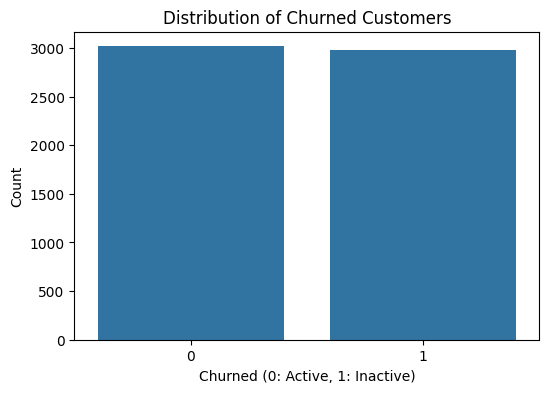

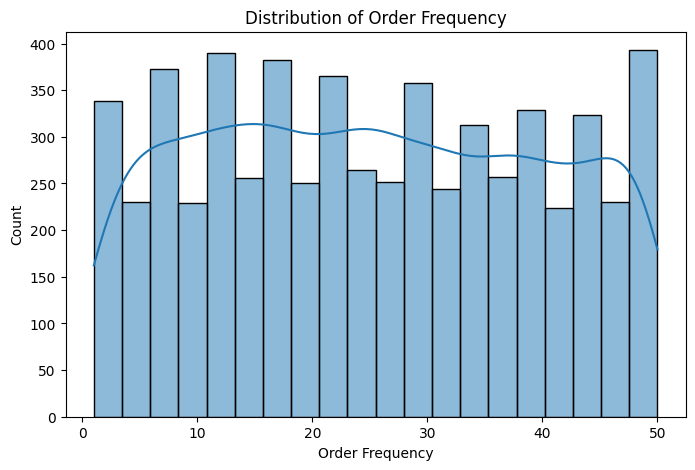

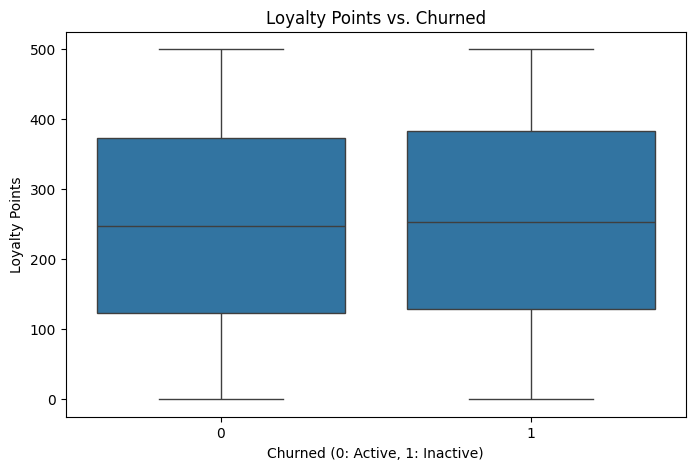

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'churned'
plt.figure(figsize=(6, 4))
sns.countplot(x='churned', data=df)
plt.title('Distribution of Churned Customers')
plt.xlabel('Churned (0: Active, 1: Inactive)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'order_frequency'
plt.figure(figsize=(8, 5))
sns.histplot(df['order_frequency'], bins=20, kde=True)
plt.title('Distribution of Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between 'loyalty_points' and 'churned'
plt.figure(figsize=(8, 5))
sns.boxplot(x='churned', y='loyalty_points', data=df)
plt.title('Loyalty Points vs. Churned')
plt.xlabel('Churned (0: Active, 1: Inactive)')
plt.ylabel('Loyalty Points')
plt.show()

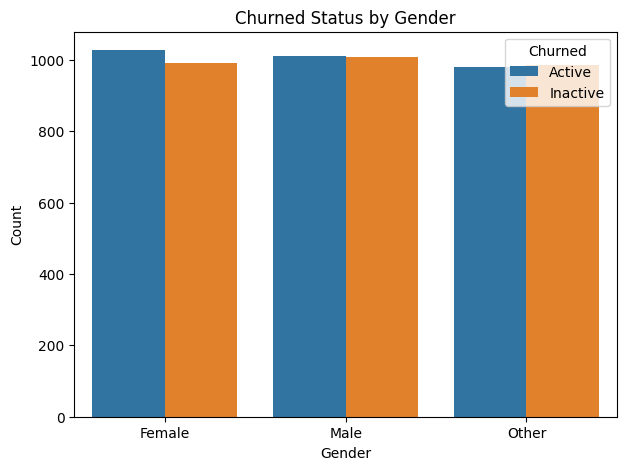

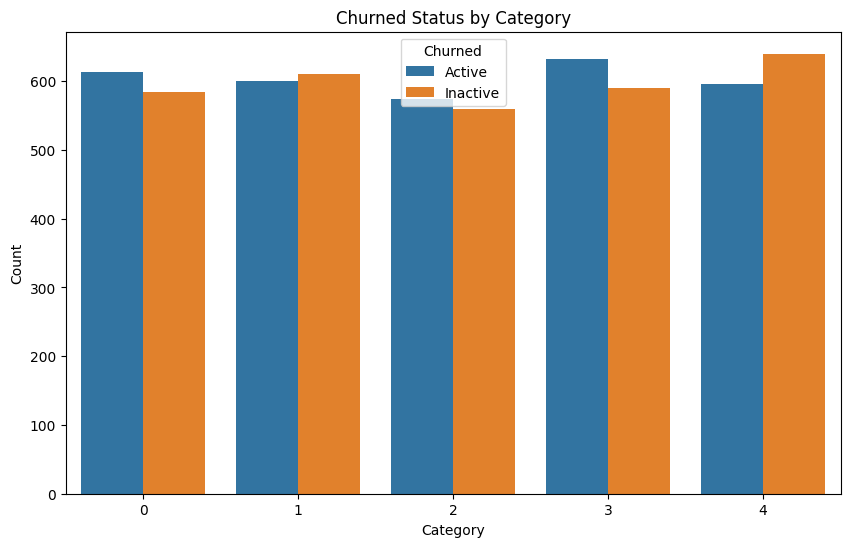

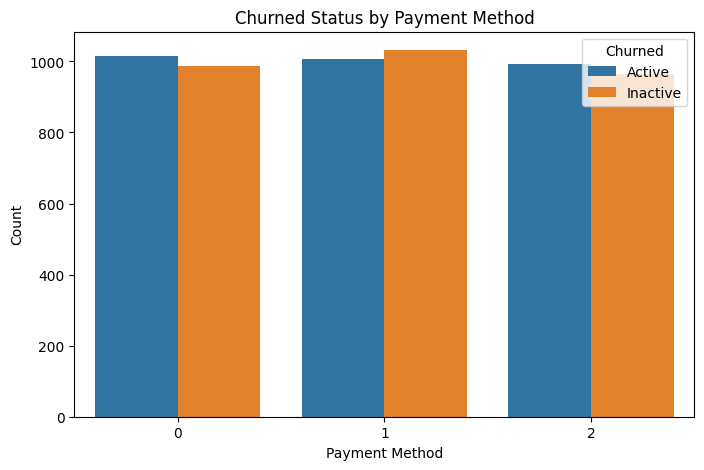

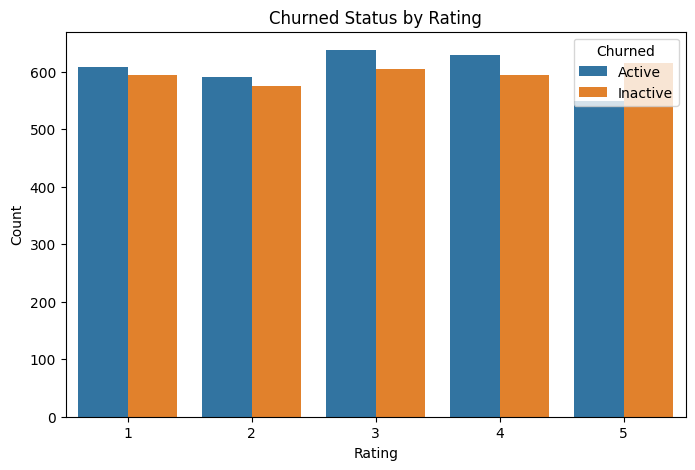

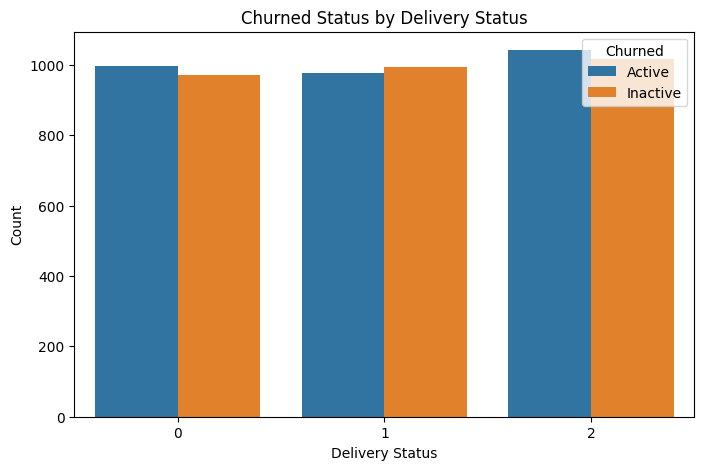

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the relationship between 'gender' and 'churned'
plt.figure(figsize=(7, 5))
sns.countplot(x='gender', hue='churned', data=df)
plt.title('Churned Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Other'])
plt.legend(title='Churned', labels=['Active', 'Inactive'])
plt.show()

# Create a bar plot to visualize the relationship between 'category' and 'churned'
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='churned', data=df)
plt.title('Churned Status by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Active', 'Inactive'])
plt.show()

# Create a bar plot to visualize the relationship between 'payment_method' and 'churned'
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_method', hue='churned', data=df)
plt.title('Churned Status by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Active', 'Inactive'])
plt.show()

# Create a bar plot to visualize the relationship between 'rating' and 'churned'
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', hue='churned', data=df)
plt.title('Churned Status by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Active', 'Inactive'])
plt.show()

# Create a bar plot to visualize the relationship between 'delivery_status' and 'churned'
plt.figure(figsize=(8, 5))
sns.countplot(x='delivery_status', hue='churned', data=df)
plt.title('Churned Status by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Active', 'Inactive'])
plt.show()

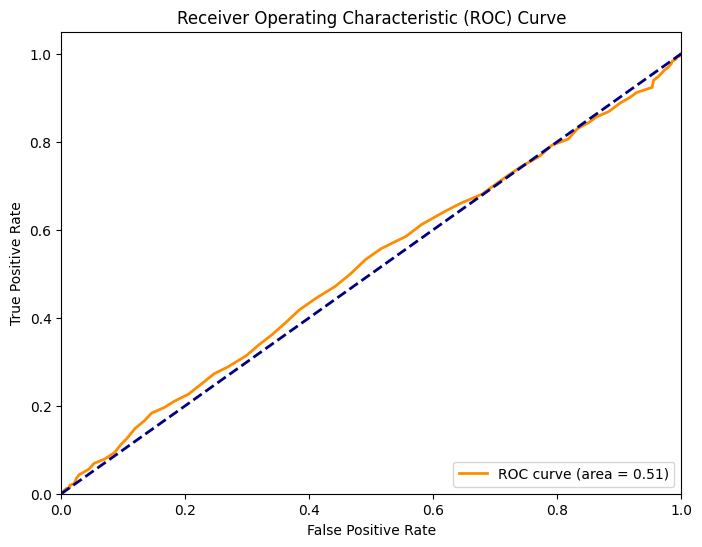

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


if hasattr(best_model, "predict_proba"):
    y_pred_proba = best_model.predict_proba(x_test)[:, 1]
else:

    print(f"The best model ({best_model_name}) does not support predict_proba directly.")
    print("Cannot generate ROC curve without predicted probabilities.")
    y_pred_proba = None

if y_pred_proba is not None:

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve could not be generated.")